#Library

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
#libraries to plot QQ plot
import scipy.stats
import pylab
#tsa libraries from statsmodels
import statsmodels.tsa.stattools as sts #for ADF test
import statsmodels.graphics.tsaplots as sgt
#Importing ARMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
#import autoarima
from pmdarima.arima import auto_arima

from scipy.stats.distributions import chi2  # used in the LLR test function to get the P_value

def LLR_test(mod_1,mod_2,DF=1):
  L1=mod_1.fit().llf
  L2=mod_2.fit().llf
  LR=(2*(L2-L1))
  p=chi2.sf(LR,DF).round(3)
  return p


# Importing the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_excel('/content/drive/MyDrive/Time Series/Trade Combined.xlsx',sheet_name='Trade',index_col='Date')
df.head()

,Value
Date,
2000-12-31,1.845590e+08
2001-12-31,1.610288e+08
2002-12-31,1.575157e+08
2003-12-31,2.255735e+08
2004-12-31,3.020699e+08


In [5]:
fig=px.line(df,x=df.index,y='Value')
fig.update_layout(xaxis_title='Date',yaxis_title='Value',template = 'plotly_white')
fig.show()

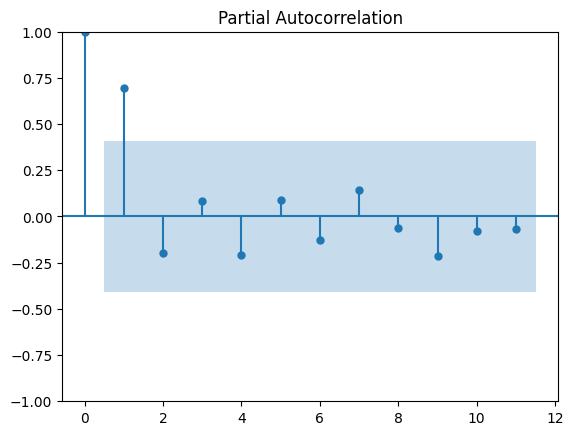

In [8]:
#Apply ACF
sgt.plot_pacf(df['Value']);

#Testing different ARMA model

In [21]:
ar1 = ARIMA(df['Value'], order=(1, 0, 0))
ar1_fit = ar1.fit()
print(ar1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -473.246
Date:                Tue, 13 Aug 2024   AIC                            952.492
Time:                        10:50:52   BIC                            955.898
Sample:                    12-31-2000   HQIC                           953.348
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.249e+08   2.36e-11   2.65e+19      0.000    6.25e+08    6.25e+08
ar.L1          0.7996      0.113      7.097      0.000       0.579       1.020
sigma2      4.031e+16   8.23e-19    4.9e+34      0.0

In [22]:
#Use the Integrated with 1 degree
ar1_I_1 = ARIMA(df['Value'], order=(1, 1, 0))
ar1_I_1_fit = ar1_I_1.fit()
print(ar1_I_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -453.028
Date:                Tue, 13 Aug 2024   AIC                            910.057
Time:                        10:50:54   BIC                            912.239
Sample:                    12-31-2000   HQIC                           910.571
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0951      0.321      0.296      0.767      -0.534       0.724
sigma2      4.706e+16   3.23e-18   1.46e+34      0.000    4.71e+16    4.71e+16
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [23]:
#Use the Integrated with 2 degree
ar1_I_2 = ARIMA(df['Value'], order=(1,2,0))
ar1_I_2_fit = ar1_I_2.fit()
print(ar1_I_2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -437.197
Date:                Tue, 13 Aug 2024   AIC                            878.395
Time:                        10:50:57   BIC                            880.484
Sample:                    12-31-2000   HQIC                           878.848
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3989      0.204     -1.955      0.051      -0.799       0.001
sigma2      7.416e+16   2.99e-19   2.48e+35      0.000    7.42e+16    7.42e+16
Ljung-Box (L1) (Q):                   0.51   Jarque-

In [35]:
LLR_test(ar1,ar1_I_2)

0.0

In [36]:
ar2 = ARIMA(df['Value'], order=(2, 0, 0))
ar2_fit = ar2.fit()
print(ar2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -472.616
Date:                Tue, 13 Aug 2024   AIC                            953.231
Time:                        10:55:01   BIC                            957.773
Sample:                    12-31-2000   HQIC                           954.374
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.249e+08   1.99e-10   3.14e+18      0.000    6.25e+08    6.25e+08
ar.L1          0.9753      0.265      3.677      0.000       0.455       1.495
ar.L2         -0.2435      0.283     -0.861      0.3

In [26]:
#Test the significance of ar2 over ar1_I_2
LLR_test(ar2,ar1_I_2)

0.0

In [38]:
ar3 = ARIMA(df['Value'], order=(3, 0, 0))
ar3_fit = ar3.fit()
print(ar3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -472.596
Date:                Tue, 13 Aug 2024   AIC                            955.192
Time:                        10:55:37   BIC                            960.869
Sample:                    12-31-2000   HQIC                           956.620
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.249e+08   2.73e-10   2.29e+18      0.000    6.25e+08    6.25e+08
ar.L1          0.9822      0.292      3.362      0.001       0.410       1.555
ar.L2         -0.2827      0.343     -0.824      0.4

**

In [39]:

ma_1 = ARIMA(df['Value'], order=(0, 0, 1))
ma_1_fit = ma_1.fit()
print(ma_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -474.726
Date:                Tue, 13 Aug 2024   AIC                            955.451
Time:                        10:56:04   BIC                            958.858
Sample:                    12-31-2000   HQIC                           956.308
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.249e+08   1.05e-10   5.95e+18      0.000    6.25e+08    6.25e+08
ma.L1          0.8122      0.183      4.440      0.000       0.454       1.171
sigma2      5.336e+16   4.83e-19    1.1e+35      0.0

In [40]:
# Fit ARIMA model
model = ARIMA(df['Value'], order=(1,0,0))
model_fit = model.fit()
# Forecasting the next 5 periods
forecast = model_fit.forecast(steps=5)


# Create a line plot
fig = go.Figure()

# Add a trace (line)
fig.add_trace(go.Scatter(x=df.index, y=df['Value'], mode='lines+markers', name='actual Data'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast, mode='lines+markers', name='Forecast'))
# Update layout
fig.update_layout(
    title='Fossil Fuels Trade value prediction'
    ,xaxis_title='Date',
    yaxis_title='Trade Value in $',
    template='plotly_white'
)

# Show the plot
fig.show()

In [ ]:
#Change the column name of forcast to Value
df_f = forecast.to_frame()
df_f.columns = ['Value']
df_f.index.name = 'Date'

df_f['Predicted/Actual'] = 'Predicted'
df_f

,Value,Predicted/Actual
Date,,
2023-12-31,1.382758e+09,Predicted
2024-12-31,1.626864e+09,Predicted
2025-12-31,1.886825e+09,Predicted
2026-12-31,2.140462e+09,Predicted
2027-12-31,2.396622e+09,Predicted


In [ ]:
df['Predicted/Actual'] = 'Actual'
df

,Value,Predicted/Actual
Date,,
2000-12-31,1.845590e+08,Actual
2001-12-31,1.610288e+08,Actual
2002-12-31,1.575157e+08,Actual
2003-12-31,2.255735e+08,Actual
2004-12-31,3.020699e+08,Actual
2005-12-31,4.209501e+08,Actual
2006-12-31,5.802128e+08,Actual
2007-12-31,6.395619e+08,Actual
2008-12-31,7.660836e+08,Actual


In [ ]:
#Append df and df_f
df_combo = pd.concat([df,df_f])
df_combo

,Value,Predicted/Actual
Date,,
2000-12-31,1.845590e+08,Actual
2001-12-31,1.610288e+08,Actual
2002-12-31,1.575157e+08,Actual
2003-12-31,2.255735e+08,Actual
2004-12-31,3.020699e+08,Actual
2005-12-31,4.209501e+08,Actual
2006-12-31,5.802128e+08,Actual
2007-12-31,6.395619e+08,Actual
2008-12-31,7.660836e+08,Actual


In [ ]:
#Save the output
df_combo.to_excel('/content/drive/MyDrive/Time Series/output.xlsx', index=True)

#AR for oil

In [41]:
df_ff = pd.read_excel('/content/drive/MyDrive/Time Series/FF_Trade_combined.xlsx',index_col=0)
df_ff

,Value,Weight_kg,price_bbl,price_kg
Year,,,,
2000,1.700039e+11,8.414142e+11,26.084117,0.191795
2001,1.478762e+11,8.478662e+11,22.714821,0.167021
2002,1.443528e+11,7.539856e+11,23.720600,0.174416
2003,2.085517e+11,9.575257e+11,26.738141,0.196604
2004,2.820620e+11,1.029016e+12,33.455866,0.245999
2005,3.916890e+11,1.057756e+12,49.294159,0.362457
2006,5.400608e+11,1.171026e+12,61.430812,0.451697
2007,5.895323e+11,1.110489e+12,68.369054,0.502714
2008,6.965659e+11,9.593530e+11,93.777133,0.689538


In [ ]:
#drob price kg
df_ff = df_ff.drop(columns=['price_kg'])
#Create Predict/actual column
df_ff['Predicted/Actual'] = 'Actual'
df_ff.head()

,Value,Weight_kg,price_bbl,Predicted/Actual
Year,,,,
2000,1.700039e+11,8.414142e+11,26.084117,Actual
2001,1.478762e+11,8.478662e+11,22.714821,Actual
2002,1.443528e+11,7.539856e+11,23.720600,Actual
2003,2.085517e+11,9.575257e+11,26.738141,Actual
2004,2.820620e+11,1.029016e+12,33.455866,Actual


#Testing different ARIMA model

In [42]:
ar1 = ARIMA(df_ff['Value'], order=(1, 0, 0))
ar1_fit = ar1.fit()
print(ar1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -629.336
Date:                Tue, 13 Aug 2024   AIC                           1264.672
Time:                        10:57:53   BIC                           1268.079
Sample:                             0   HQIC                          1265.529
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.531e+11   3.01e-14   1.84e+25      0.000    5.53e+11    5.53e+11
ar.L1          0.7902      0.115      6.851      0.000       0.564       1.016
sigma2      3.168e+22   1.05e-24   3.01e+46      0.0

In [43]:
ar1_I_1 = ARIMA(df_ff['Value'], order=(1, 1, 0))
ar1_I_1_fit = ar1_I_1.fit()
print(ar1_I_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -602.384
Date:                Tue, 13 Aug 2024   AIC                           1208.768
Time:                        10:58:00   BIC                           1210.950
Sample:                             0   HQIC                          1209.282
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0978      0.324      0.302      0.762      -0.537       0.732
sigma2       3.71e+22   3.59e-24   1.03e+46      0.000    3.71e+22    3.71e+22
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [52]:
ar1_I_2 = ARIMA(df_ff['Value'], order=(1,2,0))
ar1_I_2 = ar1_I_2.fit()
print(ar1_I_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -579.814
Date:                Tue, 13 Aug 2024   AIC                           1163.628
Time:                        11:36:10   BIC                           1165.717
Sample:                             0   HQIC                          1164.081
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3800      0.206     -1.847      0.065      -0.783       0.023
sigma2      5.875e+22   4.71e-25   1.25e+47      0.000    5.88e+22    5.88e+22
Ljung-Box (L1) (Q):                   0.57   Jarque-

In [53]:
ar2_I_2 = ARIMA(df_ff['Value'], order=(2,2,0))
ar2_I_2 = ar2_I_2.fit()
print(ar2_I_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   23
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -577.837
Date:                Tue, 13 Aug 2024   AIC                           1161.674
Time:                        11:36:13   BIC                           1164.808
Sample:                             0   HQIC                          1162.354
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5348      0.274     -1.952      0.051      -1.072       0.002
ar.L2         -0.4641      0.225     -2.060      0.039      -0.906      -0.023
sigma2      5.116e+22        nan        nan        n

In [56]:
# Fit ARIMA model
model = ARIMA(df_ff['Value'], order=(1, 0, 0))
model_fit = model.fit()

# Forecasting the next 5 periods
forecast_value = model_fit.forecast(steps=5)

forecast_value = forecast_value.to_frame()
forecast_value.columns = ['Value']
forecast_value.index.name = 'Date'
forecast_value.index = range(2023,2028)
forecast_value['Predicted/Actual'] = 'Predicted'
forecast_value

,Value,Predicted/Actual
2023,8.892375e+11,Predicted
2024,8.187116e+11,Predicted
2025,7.629848e+11,Predicted
2026,7.189519e+11,Predicted
2027,6.841588e+11,Predicted


In [58]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ff.index, y=df_ff['Value'], mode='lines+markers', name='Past Trade Value'))
fig.add_trace(go.Scatter(x=forecast_value.index, y=forecast_value.Value, mode='lines+markers', name='Forecast'))
# Update layout
fig.update_layout(
    title='Oil Trade value prediction',
    xaxis_title='Date',
    yaxis_title='Trade Value'
)
fig.show()

In [ ]:
forecast_price = forecast_price.to_frame()
forecast_price.columns = ['price_bbl']
forecast_price.index.name = 'Date'
forecast_price.index = range(2023,2028)
forecast_price['Predicted/Actual'] = 'Predicted'
forecast_price

,price_bbl,Predicted/Actual
2023,89.378549,Predicted
2024,83.417890,Predicted
2025,78.786000,Predicted
2026,75.186667,Predicted
2027,72.389708,Predicted


In [ ]:
# Fit ARIMA model
model = ARIMA(df_ff['Weight_kg'], order=(1, 0, 0))
model_fit = model.fit()
# Forecasting the next 5 periods
forecast_weight = model_fit.forecast(steps=5)
forecast_weight = forecast_weight.to_frame()
forecast_weight.columns = ['Weight_kg']
forecast_weight.index.name = 'Date'
forecast_weight.index = range(2023,2028)
forecast_weight['Predicted/Actual'] = 'Predicted'
forecast_weight

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,Weight_kg,Predicted/Actual
2023,1.217594e+12,Predicted
2024,1.175534e+12,Predicted
2025,1.146893e+12,Predicted
2026,1.127389e+12,Predicted
2027,1.114108e+12,Predicted


In [ ]:
# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_ff.index, y=df_ff['Weight_kg'], mode='lines+markers', name='Past price'))
fig.add_trace(go.Scatter(x=forecast_weight.index, y=forecast_weight.Weight_kg, mode='lines+markers', name='Forecast'))
# Update layout
fig.update_layout(
    title='Weight_kg',
    xaxis_title='Date',
    yaxis_title='Weight_kg'
)
fig.show()

In [ ]:
#combine the forcasted tables
forecast_combo = pd.concat([forecast_value,forecast_price,forecast_weight],axis=1)
#keep one predicted column
forecast_combo = forecast_combo.drop(columns=['Predicted/Actual'])
forecast_combo['Predicted/Actual'] = 'Predicted'
forecast_combo

,Value,price_bbl,Weight_kg,Predicted/Actual
2023,8.892375e+11,89.378549,1.217594e+12,Predicted
2024,8.187116e+11,83.417890,1.175534e+12,Predicted
2025,7.629848e+11,78.786000,1.146893e+12,Predicted
2026,7.189519e+11,75.186667,1.127389e+12,Predicted
2027,6.841588e+11,72.389708,1.114108e+12,Predicted


In [ ]:
output = pd.concat([df_ff,forecast_combo])
output

,Value,Weight_kg,price_bbl,Predicted/Actual
2000,1.700039e+11,8.414142e+11,26.084117,Actual
2001,1.478762e+11,8.478662e+11,22.714821,Actual
2002,1.443528e+11,7.539856e+11,23.720600,Actual
2003,2.085517e+11,9.575257e+11,26.738141,Actual
2004,2.820620e+11,1.029016e+12,33.455866,Actual
2005,3.916890e+11,1.057756e+12,49.294159,Actual
2006,5.400608e+11,1.171026e+12,61.430812,Actual
2007,5.895323e+11,1.110489e+12,68.369054,Actual
2008,6.965659e+11,9.593530e+11,93.777133,Actual
2009,4.665953e+11,9.412369e+11,61.754920,Actual


In [ ]:
#Save the output file to drive
output.to_excel('/content/drive/MyDrive/Time Series/FF_oil_output.xlsx', index=True)

#Integrate Price and Fed rate in the model

In [59]:
data = pd.read_excel('/content/drive/MyDrive/Time Series/Trade Combined_price_Fed.xlsx',index_col=0)
data.head()

,Value,Price,Fed Rate
Date,,,
2000-12-31,1.845590e+08,32.768992,6.40
2001-12-31,1.610288e+08,29.653813,1.82
2002-12-31,1.575157e+08,31.335007,1.24
2003-12-31,2.255735e+08,33.590629,0.98
2004-12-31,3.020699e+08,39.359842,2.16


In [66]:
# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add first trace (Value)
fig.add_trace(
    go.Scatter(x=data.index, y=data['Value'], mode='lines+markers', name='Trade Value'),
    secondary_y=False  )
# Add second trace (Fed Rate)
fig.add_trace(
    go.Scatter(x=data.index, y=data['Price'], mode='lines+markers', name='Fed Rate'),
    secondary_y=True  # This trace will be on the secondary y-axis
)

# Update layout
fig.update_layout(
    title='Trade Value in $ and Fed Rate',
    xaxis_title='Date',
    yaxis_title='Trade Value',
    yaxis2_title='Fed Rate',
)

# Show the plot
fig.show()

In [67]:
# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add first trace (Value)
fig.add_trace(
    go.Scatter(x=data.index, y=data['Fed Rate'], mode='lines+markers', name='Fed Rate'),
    secondary_y=False  )
# Add second trace (Fed Rate)
fig.add_trace(
    go.Scatter(x=data.index, y=data['Price'], mode='lines+markers', name='Price'),
    secondary_y=True  # This trace will be on the secondary y-axis
)

# Update layout
fig.update_layout(
    title='Oil Price and Fed Rate',
    xaxis_title='Date',
    yaxis_title='Oil Price',
    yaxis2_title='Fed Rate',
)

# Show the plot
fig.show()

In [62]:
data.corr()

,Value,Price,Fed Rate
Value,1.000000,0.920383,-0.318002
Price,0.920383,1.000000,-0.242995
Fed Rate,-0.318002,-0.242995,1.000000


In [68]:
#running Linear regression
import statsmodels.api as sm
X = data['Fed Rate']
y = data['Value']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.363
Date:                Tue, 13 Aug 2024   Prob (F-statistic):              0.139
Time:                        11:41:59   Log-Likelihood:                -481.63
No. Observations:                  23   AIC:                             967.3
Df Residuals:                      21   BIC:                             969.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.125e+08   8.69e+07      8.199      0.0